In [1]:
import numpy as np
import pandas as pd

from src.models.synthesis.evaluate_models import SynthesisAnalysis
from src.models.synthesis.train_models import SynthesisTraining

In [2]:
st = SynthesisTraining()
sa = SynthesisAnalysis()

results = st.load_training_models()
indices = sa.load_performance_indices()

In [3]:
outputs = results["outputs"]
outputs = [
    {"model_id": model["model_id"], "model_name": model["model_name"], **model["params"], **model["opt"]}
    for model in outputs
    if model["model_type"] == "wgan"
]
outputs.insert(0, {"model_id": results["outputs"][0]["model_id"], "model_name": "Dirichlet"})

table = pd.DataFrame.from_records(outputs).fillna("-")
table
# table.to_latex(os.path.join(self.viz_folder, "models_table.tex"), index=False)

,model_id,model_name,hidden_units,activation,latent_dim,lr,beta_1,beta_2,lambda,n_critic,epochs,batch_size
0,1,Dirichlet,-,-,-,-,-,-,-,-,-,-
1,2,WGAN #1,"[64, 64, 64]",relu,8.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
2,3,WGAN #2,"[64, 64, 64]",relu,16.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
3,4,WGAN #3,"[64, 64, 64]",relu,32.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
4,5,WGAN #4,"[128, 128, 128]",relu,8.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
5,6,WGAN #5,"[128, 128, 128]",relu,16.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
6,7,WGAN #6,"[128, 128, 128]",relu,32.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
7,8,WGAN #7,"[256, 256, 256]",relu,8.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
8,9,WGAN #8,"[256, 256, 256]",relu,16.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0
9,10,WGAN #9,"[256, 256, 256]",relu,32.0,0.0001,0.5,0.9,10.0,5.0,3000.0,32.0


In [9]:
k_folds = 5

model_names = [res["model_name"].replace("#", "\#") for res in results["outputs"]]
data = {}
for name in indices.keys():
    index = indices[name]
    mean, std = index.mean(axis=0), index.std(axis=0) / np.sqrt(k_folds - 1)
    data[name.replace("_", "\_")] = [rf"{mu:.4f} \textpm {sigma:.4f}" for mu, sigma in zip(mean, std)]

table = pd.DataFrame(data, index=model_names)
table.columns = [" ".join([s.capitalize() for s in col.split("_")]) for col in table.columns]


def highlight(s, props=""):
    mu = s.apply(lambda row: float(row.split(r" \textpm ")[0]))
    return np.where(mu == np.min(mu.values), props, "")


table = table.style.apply(highlight, props="font-weight:bold;", axis=0)
table
# table.to_latex(
#     os.path.join(self.viz_folder, "performance_indices_table.tex"),
#     hrules=True,
#     convert_css=True,
#     column_format="lccccc",
# )

,Kl\ Divergence,Wasserstein\ Distance
Dirichlet Estimator,7.8139 \textpm 0.1579,0.1199 \textpm 0.0016
WGAN \#1,4.1117 \textpm 0.5350,0.0705 \textpm 0.0022
WGAN \#2,4.9321 \textpm 0.6279,0.0561 \textpm 0.0034
WGAN \#3,4.7029 \textpm 0.2730,0.0558 \textpm 0.0015
WGAN \#4,4.8759 \textpm 0.2932,0.0590 \textpm 0.0036
WGAN \#5,4.6598 \textpm 0.3839,0.0569 \textpm 0.0043
WGAN \#6,4.8853 \textpm 0.2016,0.0514 \textpm 0.0014
WGAN \#7,5.0304 \textpm 0.5069,0.0557 \textpm 0.0031
WGAN \#8,4.5242 \textpm 0.3220,0.0565 \textpm 0.0025
WGAN \#9,4.6017 \textpm 0.1281,0.0562 \textpm 0.0039


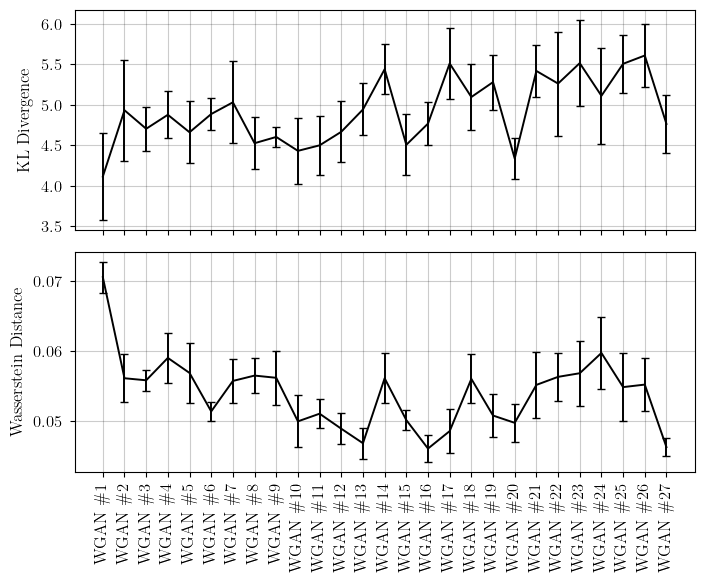

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n_folds = 5
kl_divergence = indices["kl_divergence"]
wasserstein_dist = indices["wasserstein_distance"]
models = [model["model_name"].replace("#", "\#") for model in results["outputs"]][1:]

x = np.arange(len(models))
y = np.mean(kl_divergence, axis=0)
yerr = np.std(kl_divergence, axis=0) / np.sqrt(n_folds - 1)

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
axs[0].errorbar(x=x, y=y[1:], yerr=yerr[1:], fmt="", capsize=3)
axs[0].grid(True)
# axs[0].set_ylabel(r"$\widehat{D}_{\mathrm{KL}}(P|Q)$")
axs[0].set_ylabel("KL Divergence")

y = np.mean(wasserstein_dist, axis=0)
yerr = np.std(wasserstein_dist, axis=0) / np.sqrt(n_folds - 1)

axs[1].errorbar(x=x, y=y[1:], yerr=yerr[1:], fmt="", capsize=3)
axs[1].grid(True)
# axs[1].set_ylabel(r"$\widehat{W}_{1}(\mu,\nu)$")
axs[1].set_ylabel("Wasserstein Distance")
axs[1].set_xticks(x, models, rotation=90, ha="center")

f.subplots_adjust(hspace=0.1)
plt.show()